# Bayes Learning Demonstration
### Extract the Probability of Heads from a Coin Flip Experiment Using Bayes' Theorem
####  James B. Cole (James.Cole.ctr@afit.edu or james.b.cole.3142@gmail.com), Version 7 May 2018.
Inspired by a program from Capt. Robert Loibl  (10 Feb. 2018).

Bayes' theorem is applied to extract the distribution of $p$, the probabilty that a given coin flip yields heads. 

In [1]:
import math as m
import numpy as np
import random
import matplotlib.pyplot as plt
#import matplotlib.animation as animation

Data $D = (H,T) $ is the number of heads ($H$) and number of tails ($T$) in a trial set. Probability of heads is $p$. Given $D$ we seek the unknown value of $p$. 

In [2]:
pH0 = 0.5 # true probability of heads 

Probability of $D$ given $p$:

\begin{equation*}
      P( D \, | \, p) = \frac{(H + T)! }{H!T!} p^H (1 - p)^T 
\end{equation*}
 This is called a *conditional* probability.

In [3]:
# probability of h heads and t tails if probability of heads is p
def probHT(p,h,t):
        return ( p**h * (1.0 - p)**t ) * m.factorial(h+t) / (m.factorial(h) * m.factorial(t))
#
# if $(h+t)$ is much larger than 100 you should implement this function using Stirling's approximation. 

### Application of Bayes' Theorem
Let $\rho_0$ be the probability distribution of $p$ before any data is collected. This is called the *prior* distribution.  According to Bayes' theorem, the probability distribution of $p$ after collecting the data is distribution.  
\begin{equation*}
\rho_1(p \, | \, D) = \frac{ P( D \, | \, p) \, \rho_0(p) }{ \int_0^1 { dp \, P( D \, | \, p) \, \rho_0(p) } } \,\,\,\,\,\,(1) 
\end{equation*}
This is called the *posterior* distribution. 

#### First posterior
Assuming no prior information about the coin we take the prior to be a flat distribution: $\rho_0(p) = 1$ for $0 \le p \le 1 $. Thus 
\begin{align}
\rho_1(p \, | \, D)& =  \frac{ P( D \, | \, p) }{ \int_0^1 { dp \, P( D \, | \, p) } }     \\
                   & =  \frac{(H + T + 1)! }{H!T!} p^H (1 - p)^T \,\,\,(2)
\end{align}


In [4]:
# first posterior distribution (after one set of flips) for flat prior (eqn. 2 above)       
def rho1(p,h,t):
    return ( p**h * (1.0 - p)**t ) * m.factorial(h+t+1) / (m.factorial(h) * m.factorial(t))
#
# if $(h+t)$ is much larger than 100 you should implement this function using Stirling's approximation. 

Define a Trial Set (set of NF flips). Output is [number of heads, number of tails]

In [5]:
# probability of tails (0) = 1.0 - pH0; probability of heads (q) = pH0.
list_of_weights = [1.0 - pH0,pH0]  
#
# heads (0) or tails (1); more than two choices is allowed
list_of_choices = [0,1]
#
# Define a TrialSet (NF flips) 
def TrialSet(NF):
    D = [] # intilalize data list
    D = random.choices(list_of_choices, weights = list_of_weights, k = NF)
    H = sum(D)          # number of heads
    T = NF - H          # number of tails
    result = [H,T]
    return result

Define disretized probability distributions. **Nd** equally spaced probabilities $0 \le p \le 1$. 

**Note:** the discretization limits the accuracy of the Bayesian estimate of $p$. 

In [6]:
# Set Number of discrete probability values
Nd = 200

In [7]:
# array of Nd equally spaced probability values from 0.0 to 1.0    

delta_p = 1.0 / float(Nd)  # probability interval; and resolution of the Bayesian estimate
#
pvalues = np.arange(0.5*delta_p,1.0,delta_p)  # array
Lpvalues = pvalues.tolist()                   # list

define auxilliary functions

In [8]:
# multiply two lists element by element; output array
#
def MultLists(X,Y):
    AX = np.array(X)
    AY = np.array(Y)
    return AX*AY
#
# numerically integrate two lists of values; output array 
#
def IntegLists(X,Y):
    S = MultLists(X,Y)
    return sum(S) / float(Nd)

Set number of flips (**NF**) flips in all Trial Sets) 

In [9]:
NF = 32

#### Trial Zero
Run the zero-th Trial Set first posterior distribution following eqn. 2.

true probabilty of heads =  0.5 , Bayesian estimate =  0.407 ; simple estimate = H /(H+T) =  0.406
Check normalization: integral of posterior =  1.0
TrialSet =  0


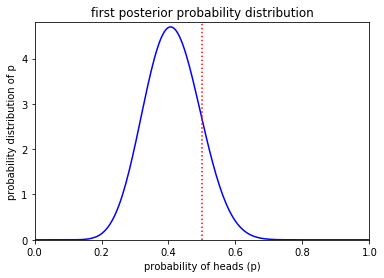

In [10]:
# trial 0
Result0 = TrialSet(NF)
H = Result0[0]
T = Result0[1]
#
# start running total of heads amd tails over all trials
NumHeads = H
NumTails = T
#
# simple estimate of probability of heads = H/(T+H)
Simple_est = round(float(NumHeads) / float(NumHeads + NumTails), 3)
#
Lrho1 = []                           # initialize     
for i in range(0,Nd):                # i = 0, 1, 2, ..., Nd-1 (excludes stop value)
    prob = rho1(Lpvalues[i],H,T)
    Lrho1.append(prob)
#
# Check normalization of the posterior probability distribution
IntLrho1 = sum(Lrho1)/float(Nd)   # integrate probability density 
IntLrho1 = round(IntLrho1,5)      # round it off
#
# (location of) peak of the probability distribution is estimate of pH0 
peak_index0 = Lrho1.index(max(Lrho1))  
prob_peak0 = Lpvalues[peak_index0]    # probability corresponding to posterior peak
Bayes_est = round(prob_peak0,3)       # Bayesian estimate of the probability of heads
#
# start list of errors / running total of flips
errorB = [Bayes_est - pH0]   # error of the Bayes estimate
errorS = [Simple_est - pH0]  # error of the simple estimate
flips = [NF]                 # running total number of flips
#
print("true probabilty of heads = ", pH0, ", Bayesian estimate = ", Bayes_est, "; simple estimate = H /(H+T) = ", Simple_est)
print("Check normalization: integral of posterior = ", IntLrho1)
print("TrialSet = ", 0)
#
plt.xlim(0.0,1.0)
plt.xlabel('probability of heads (p)')
plt.ylabel('probability distribution of p')
#
plt.ylim(0.0, max(Lrho1) + 0.1)    
plt.plot(Lpvalues, Lrho1, color = "b" )
plt.axvline(x=pH0, color = "r", linestyle = ":")    # indicate true probabilty of heads with verical line

plt.title('first posterior probability distribution')
#
plt.show()

Above graph is the posterior distribution after the zeroth Trial Set.
In the next set of flips $\rho_1(p \, | \, D) \to \rho_0(p)$ in eqn. (1)

Verical dotted line indicates true value 

#### Intialize and then run **NTrials** Trial Sets

true probabilty of heads =  0.5 , Bayesian estimate =  0.452 ; simple estimate = H /(H+T) =  0.453
Check normalization: integral of posterior =  1.0
TrialSet =  1


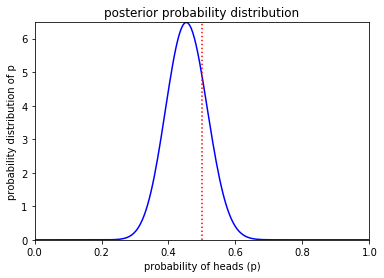

true probabilty of heads =  0.5 , Bayesian estimate =  0.477 ; simple estimate = H /(H+T) =  0.479
Check normalization: integral of posterior =  1.0
TrialSet =  2


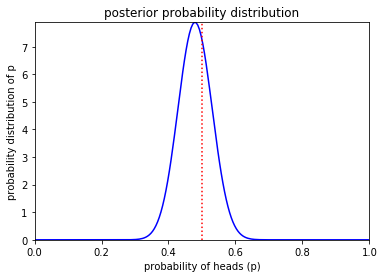

true probabilty of heads =  0.5 , Bayesian estimate =  0.447 ; simple estimate = H /(H+T) =  0.445
Check normalization: integral of posterior =  1.0
TrialSet =  3


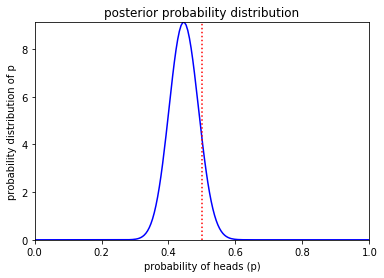

true probabilty of heads =  0.5 , Bayesian estimate =  0.487 ; simple estimate = H /(H+T) =  0.487
Check normalization: integral of posterior =  1.0
TrialSet =  4


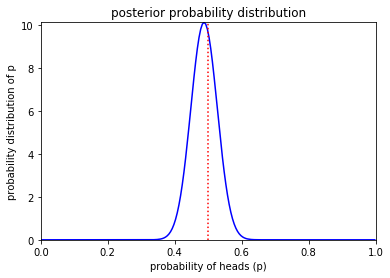

true probabilty of heads =  0.5 , Bayesian estimate =  0.492 ; simple estimate = H /(H+T) =  0.495
Check normalization: integral of posterior =  1.0
TrialSet =  5


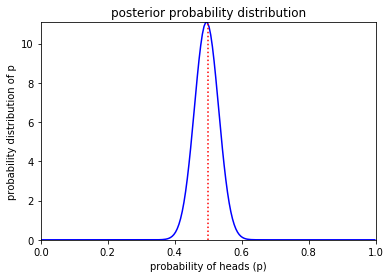

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  6


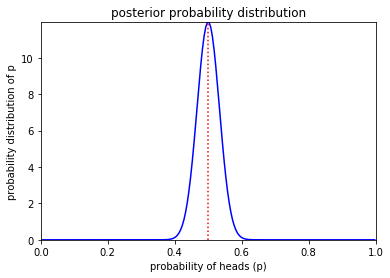

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  7


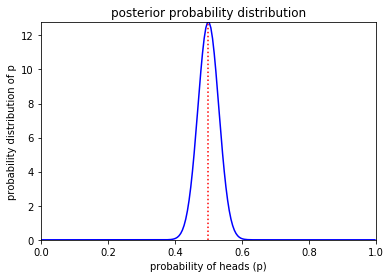

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  8


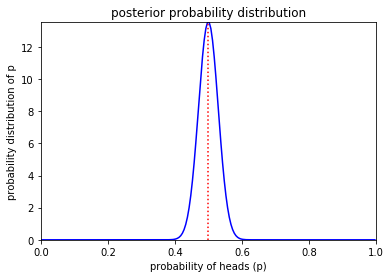

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  9


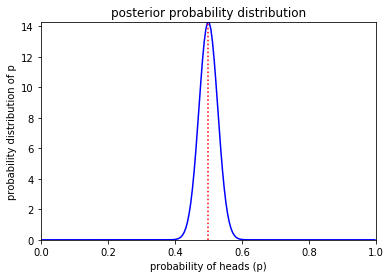

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  10


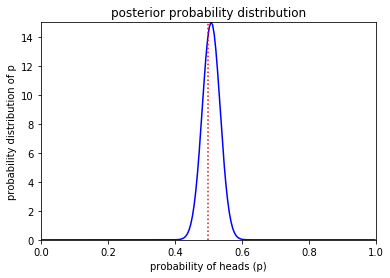

true probabilty of heads =  0.5 , Bayesian estimate =  0.492 ; simple estimate = H /(H+T) =  0.492
Check normalization: integral of posterior =  1.0
TrialSet =  11


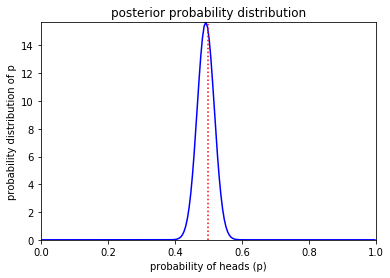

true probabilty of heads =  0.5 , Bayesian estimate =  0.487 ; simple estimate = H /(H+T) =  0.488
Check normalization: integral of posterior =  1.0
TrialSet =  12


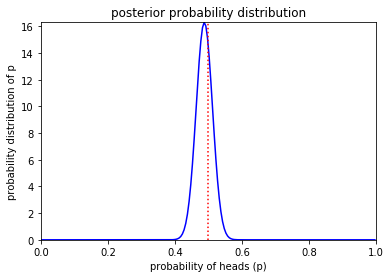

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  13


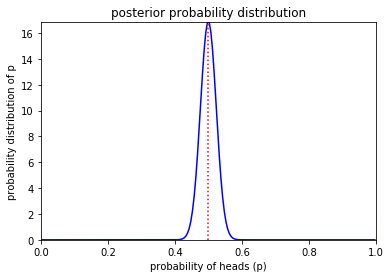

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.515
Check normalization: integral of posterior =  1.0
TrialSet =  14


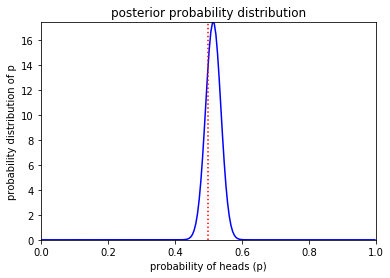

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.508
Check normalization: integral of posterior =  1.0
TrialSet =  15


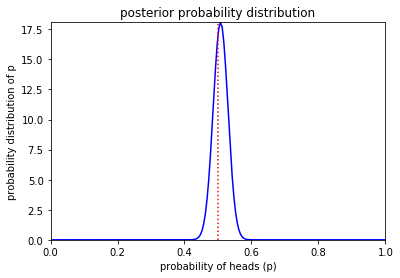

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.511
Check normalization: integral of posterior =  1.0
TrialSet =  16


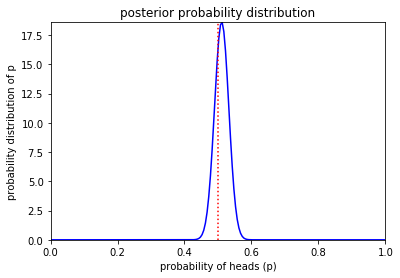

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.51
Check normalization: integral of posterior =  1.0
TrialSet =  17


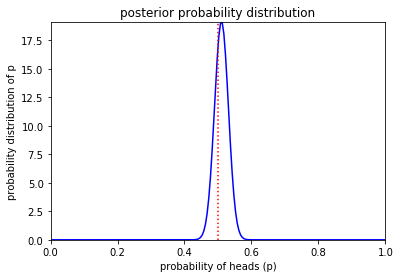

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.51
Check normalization: integral of posterior =  1.0
TrialSet =  18


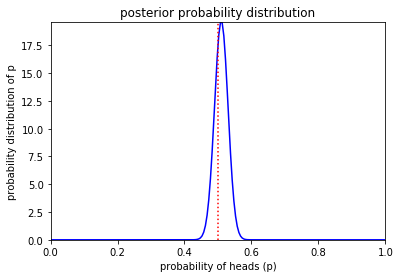

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  19


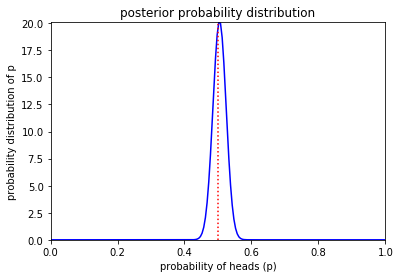

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.513
Check normalization: integral of posterior =  1.0
TrialSet =  20


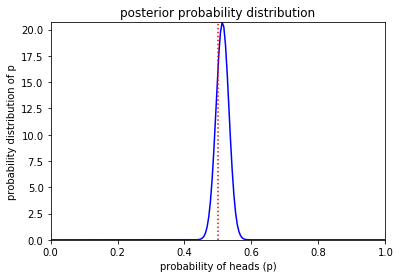

true probabilty of heads =  0.5 , Bayesian estimate =  0.517 ; simple estimate = H /(H+T) =  0.516
Check normalization: integral of posterior =  1.0
TrialSet =  21


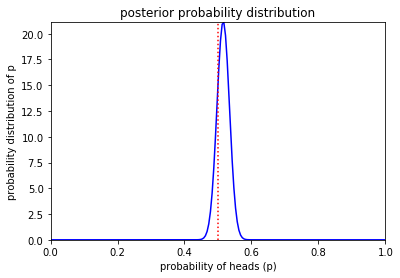

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.511
Check normalization: integral of posterior =  1.0
TrialSet =  22


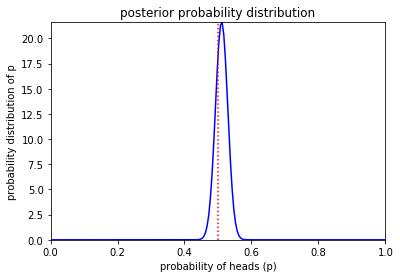

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.507
Check normalization: integral of posterior =  1.0
TrialSet =  23


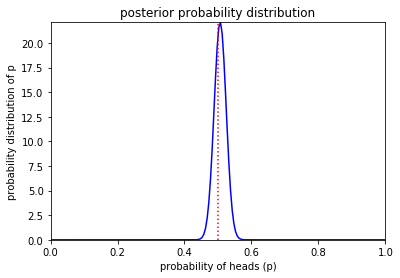

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.51
Check normalization: integral of posterior =  1.0
TrialSet =  24


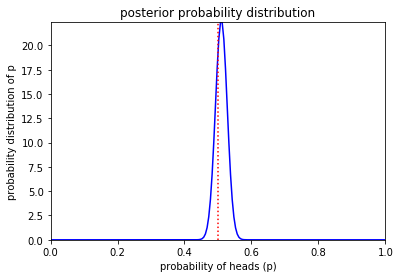

true probabilty of heads =  0.5 , Bayesian estimate =  0.517 ; simple estimate = H /(H+T) =  0.516
Check normalization: integral of posterior =  1.0
TrialSet =  25


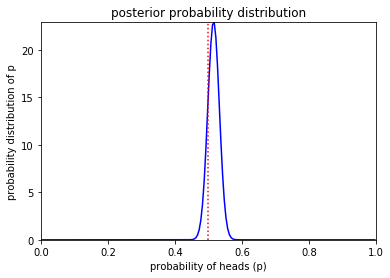

true probabilty of heads =  0.5 , Bayesian estimate =  0.517 ; simple estimate = H /(H+T) =  0.515
Check normalization: integral of posterior =  1.0
TrialSet =  26


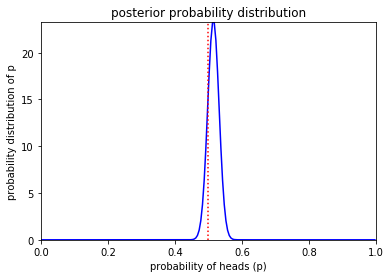

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.513
Check normalization: integral of posterior =  1.0
TrialSet =  27


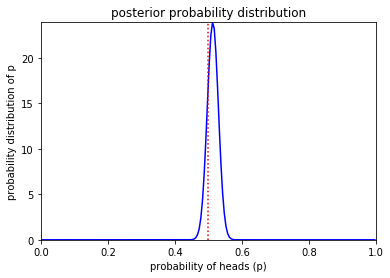

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.514
Check normalization: integral of posterior =  1.0
TrialSet =  28


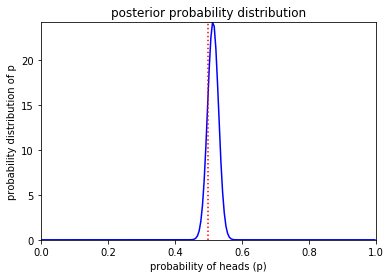

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.512
Check normalization: integral of posterior =  1.0
TrialSet =  29


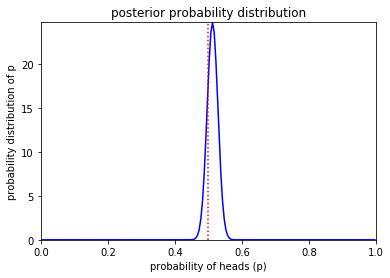

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  30


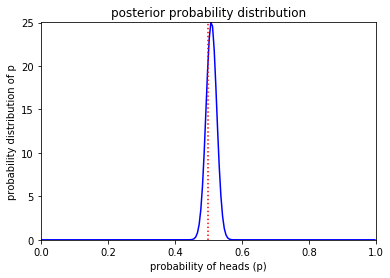

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.506
Check normalization: integral of posterior =  1.0
TrialSet =  31


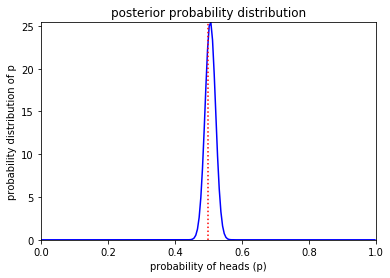

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.508
Check normalization: integral of posterior =  1.0
TrialSet =  32


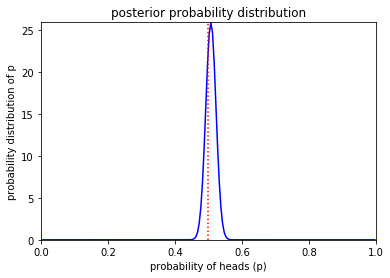

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.506
Check normalization: integral of posterior =  1.0
TrialSet =  33


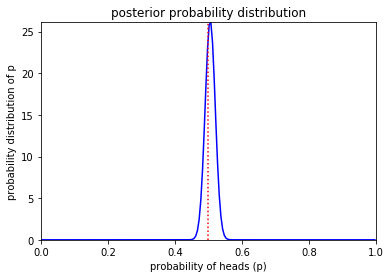

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.506
Check normalization: integral of posterior =  1.0
TrialSet =  34


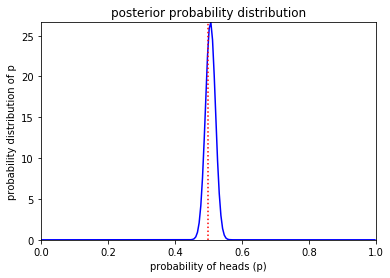

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.511
Check normalization: integral of posterior =  1.0
TrialSet =  35


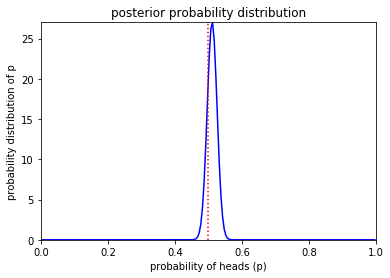

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  36


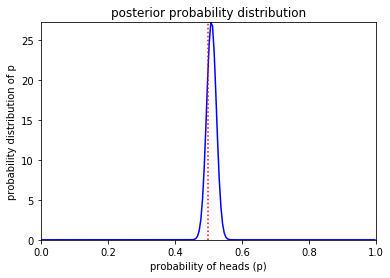

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.51
Check normalization: integral of posterior =  1.0
TrialSet =  37


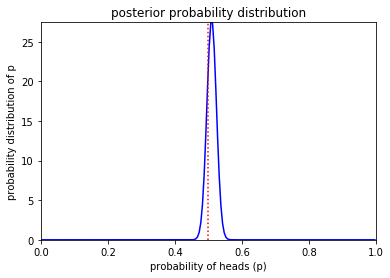

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.508
Check normalization: integral of posterior =  1.0
TrialSet =  38


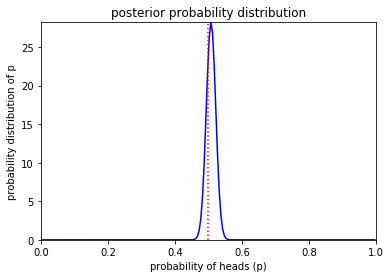

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.507
Check normalization: integral of posterior =  1.0
TrialSet =  39


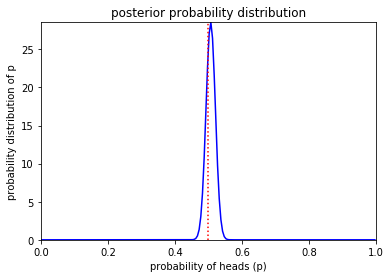

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.504
Check normalization: integral of posterior =  1.0
TrialSet =  40


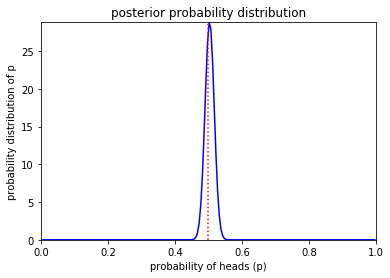

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  41


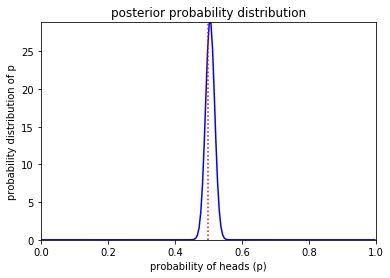

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.503
Check normalization: integral of posterior =  1.0
TrialSet =  42


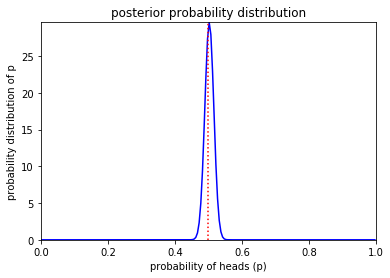

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.502
Check normalization: integral of posterior =  1.0
TrialSet =  43


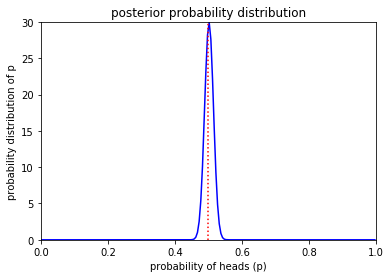

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.501
Check normalization: integral of posterior =  1.0
TrialSet =  44


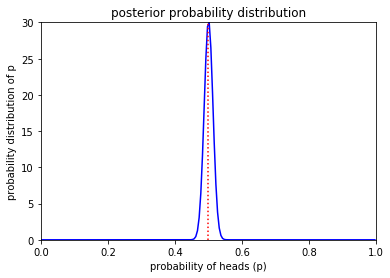

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.501
Check normalization: integral of posterior =  1.0
TrialSet =  45


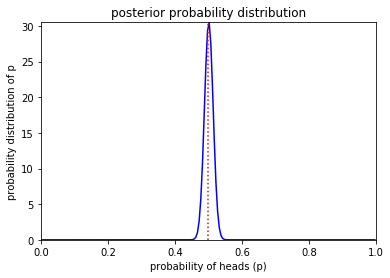

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.503
Check normalization: integral of posterior =  1.0
TrialSet =  46


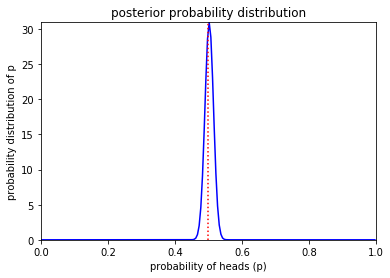

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.502
Check normalization: integral of posterior =  1.0
TrialSet =  47


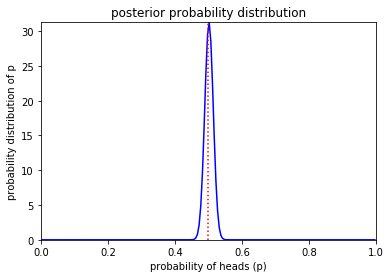

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.502
Check normalization: integral of posterior =  1.0
TrialSet =  48


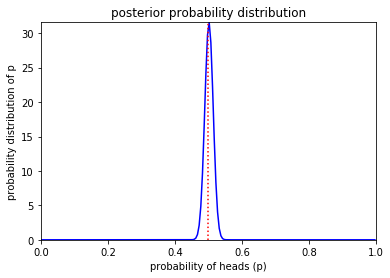

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.502
Check normalization: integral of posterior =  1.0
TrialSet =  49


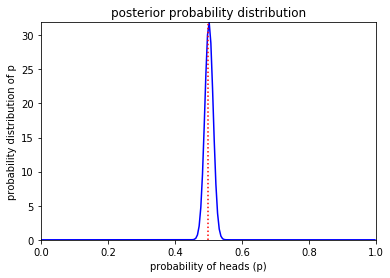

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  50


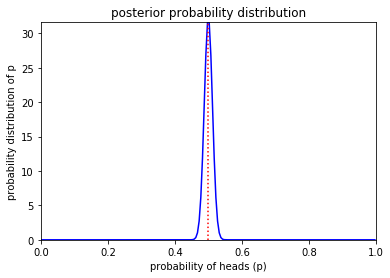

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.498
Check normalization: integral of posterior =  1.0
TrialSet =  51


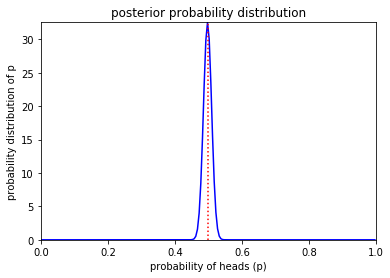

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.496
Check normalization: integral of posterior =  1.0
TrialSet =  52


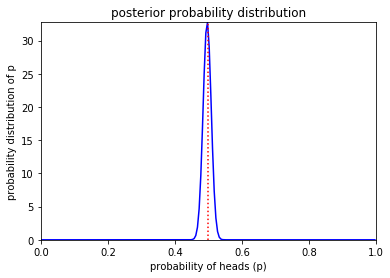

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.497
Check normalization: integral of posterior =  1.0
TrialSet =  53


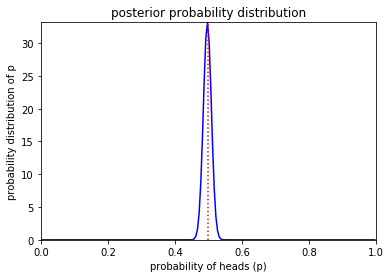

true probabilty of heads =  0.5 , Bayesian estimate =  0.492 ; simple estimate = H /(H+T) =  0.495
Check normalization: integral of posterior =  1.0
TrialSet =  54


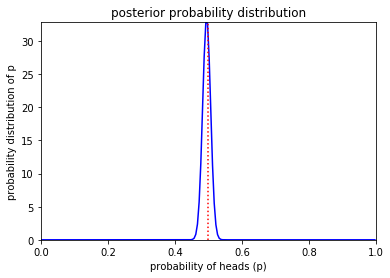

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.496
Check normalization: integral of posterior =  1.0
TrialSet =  55


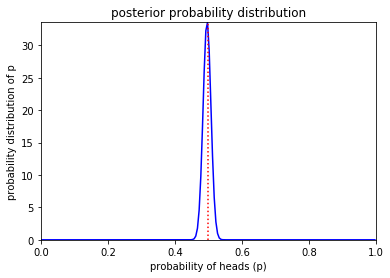

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.499
Check normalization: integral of posterior =  1.0
TrialSet =  56


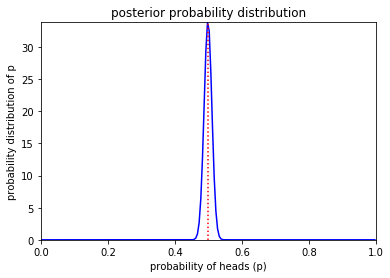

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.499
Check normalization: integral of posterior =  1.0
TrialSet =  57


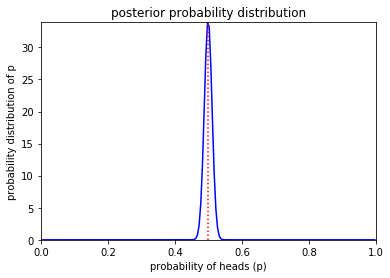

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  58


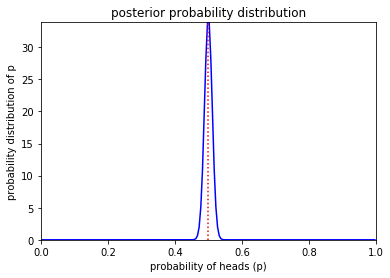

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.502
Check normalization: integral of posterior =  1.0
TrialSet =  59


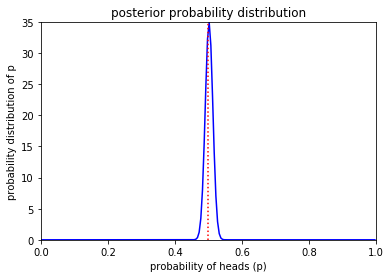

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.502
Check normalization: integral of posterior =  1.0
TrialSet =  60


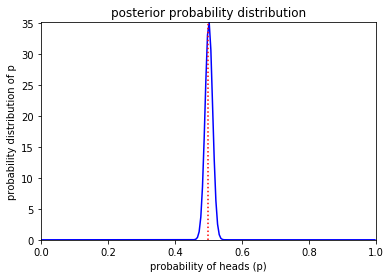

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.501
Check normalization: integral of posterior =  1.0
TrialSet =  61


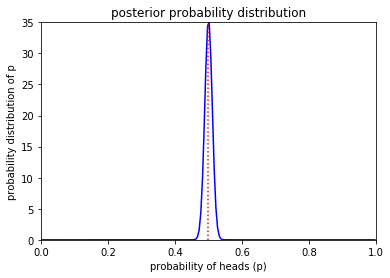

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.503
Check normalization: integral of posterior =  1.0
TrialSet =  62


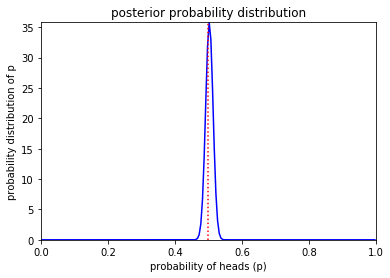

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.502
Check normalization: integral of posterior =  1.0
TrialSet =  63


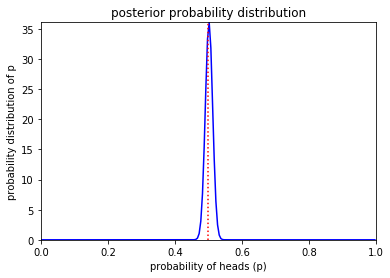

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  64


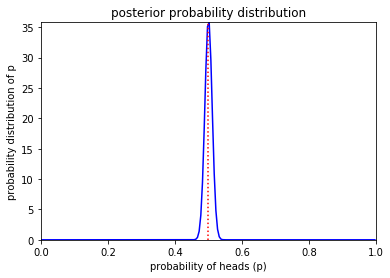

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.497
Check normalization: integral of posterior =  1.0
TrialSet =  65


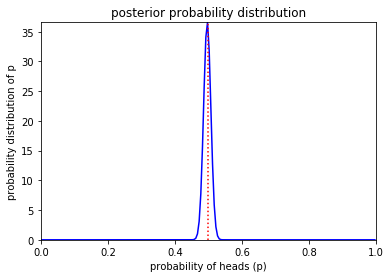

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.497
Check normalization: integral of posterior =  1.0
TrialSet =  66


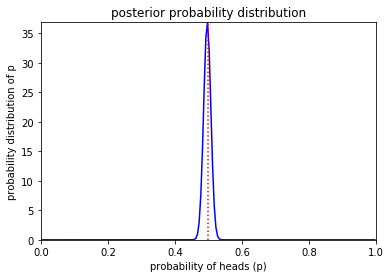

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.497
Check normalization: integral of posterior =  1.0
TrialSet =  67


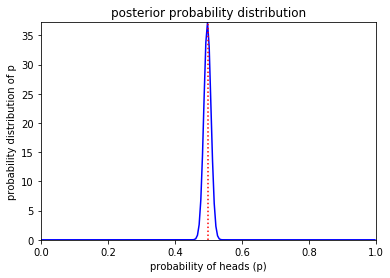

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.497
Check normalization: integral of posterior =  1.0
TrialSet =  68


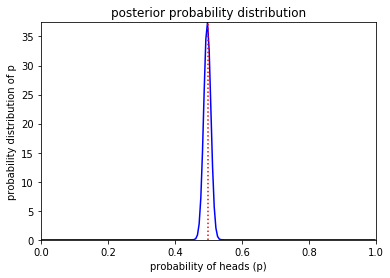

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.496
Check normalization: integral of posterior =  1.0
TrialSet =  69


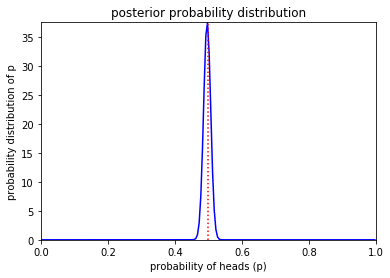

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.498
Check normalization: integral of posterior =  1.0
TrialSet =  70


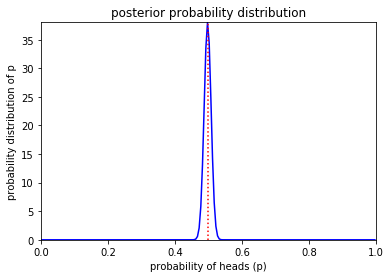

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  71


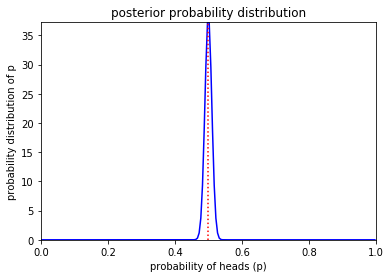

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  72


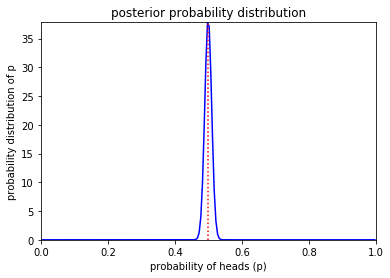

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.498
Check normalization: integral of posterior =  1.0
TrialSet =  73


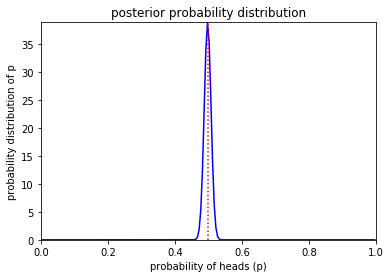

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.498
Check normalization: integral of posterior =  1.0
TrialSet =  74


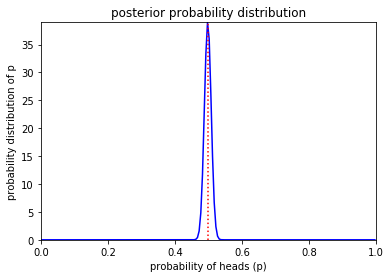

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.498
Check normalization: integral of posterior =  1.0
TrialSet =  75


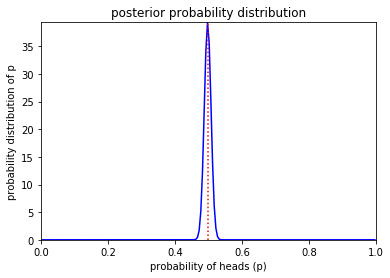

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.498
Check normalization: integral of posterior =  1.0
TrialSet =  76


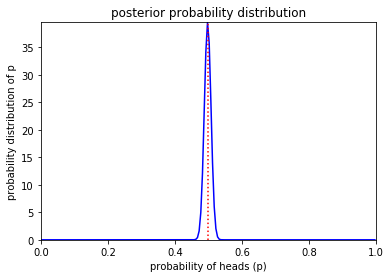

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.498
Check normalization: integral of posterior =  1.0
TrialSet =  77


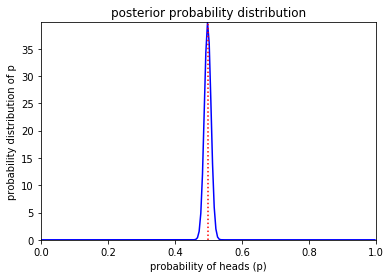

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.498
Check normalization: integral of posterior =  1.0
TrialSet =  78


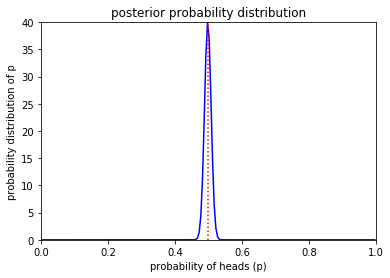

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.499
Check normalization: integral of posterior =  1.0
TrialSet =  79


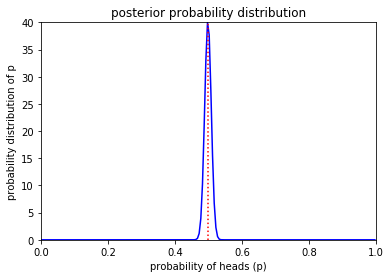

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.499
Check normalization: integral of posterior =  1.0
TrialSet =  80


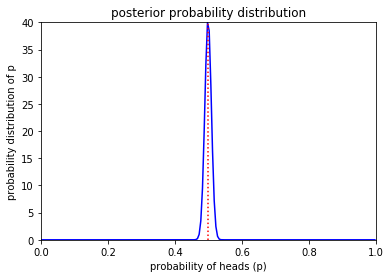

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.499
Check normalization: integral of posterior =  1.0
TrialSet =  81


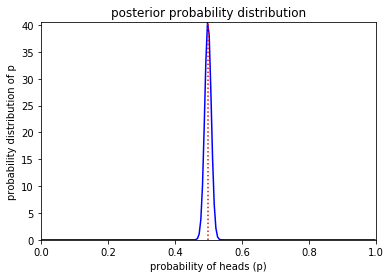

true probabilty of heads =  0.5 , Bayesian estimate =  0.497 ; simple estimate = H /(H+T) =  0.5
Check normalization: integral of posterior =  1.0
TrialSet =  82


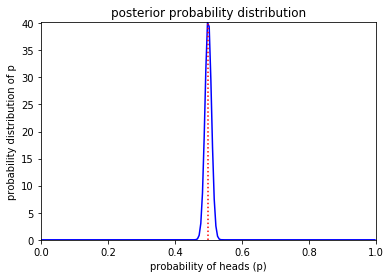

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.502
Check normalization: integral of posterior =  1.0
TrialSet =  83


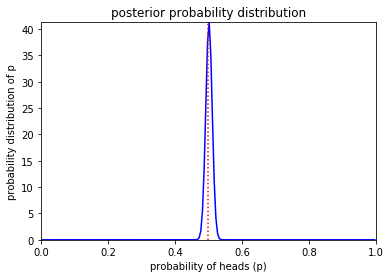

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.501
Check normalization: integral of posterior =  1.0
TrialSet =  84


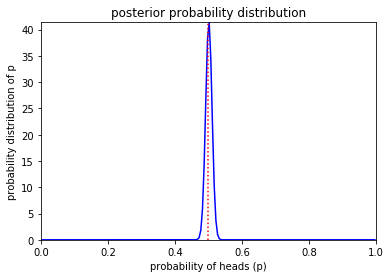

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.502
Check normalization: integral of posterior =  1.0
TrialSet =  85


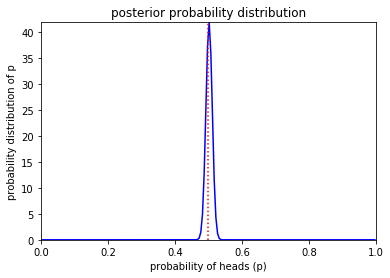

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.503
Check normalization: integral of posterior =  1.0
TrialSet =  86


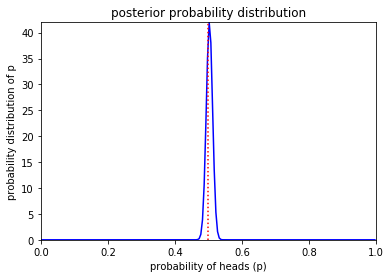

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.503
Check normalization: integral of posterior =  1.0
TrialSet =  87


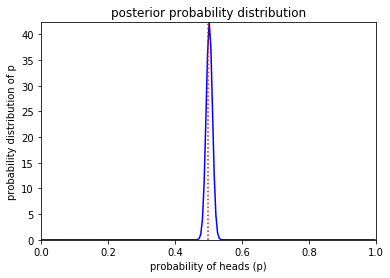

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.503
Check normalization: integral of posterior =  1.0
TrialSet =  88


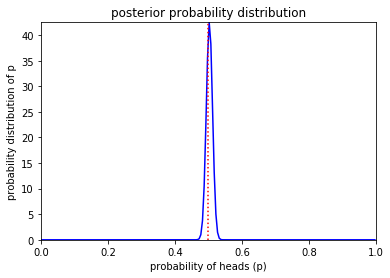

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.503
Check normalization: integral of posterior =  1.0
TrialSet =  89


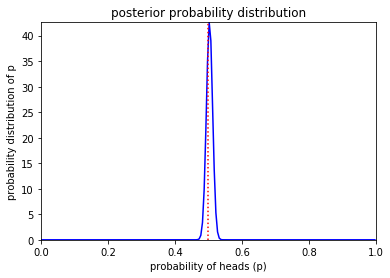

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.504
Check normalization: integral of posterior =  1.0
TrialSet =  90


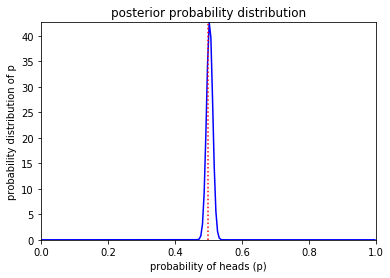

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.504
Check normalization: integral of posterior =  1.0
TrialSet =  91


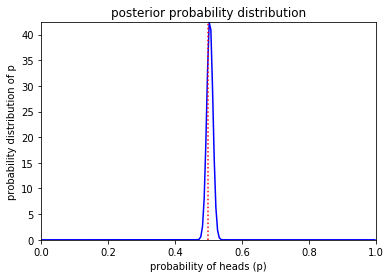

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  92


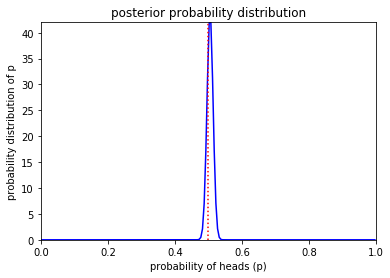

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  93


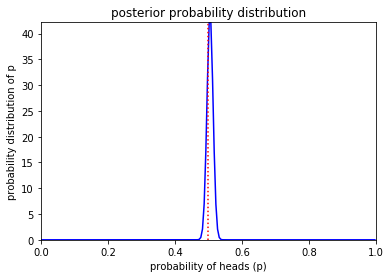

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  94


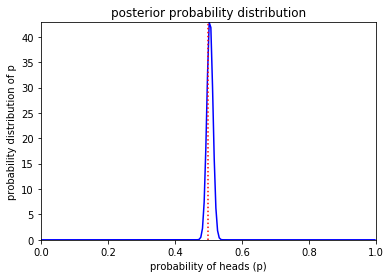

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  95


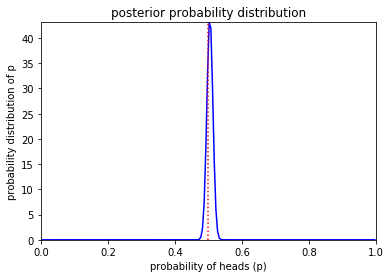

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  96


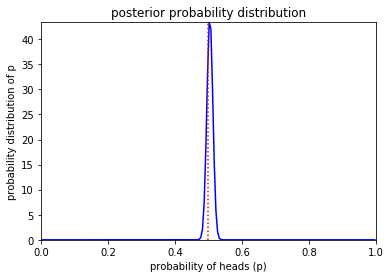

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  97


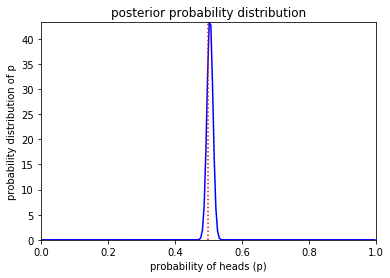

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.503
Check normalization: integral of posterior =  1.0
TrialSet =  98


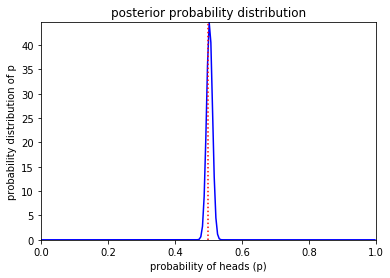

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  99


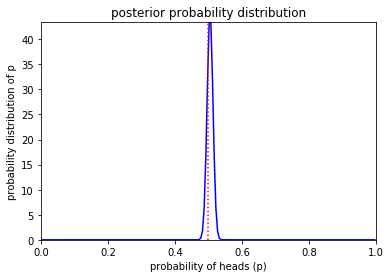

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  100


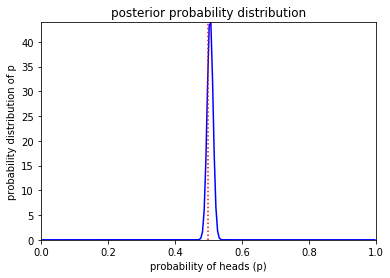

true probabilty of heads =  0.5 , Bayesian estimate =  0.502 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  101


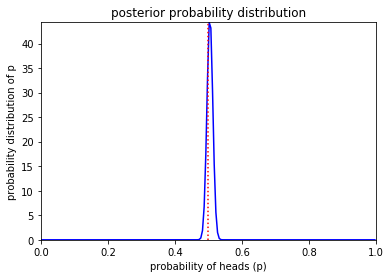

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  102


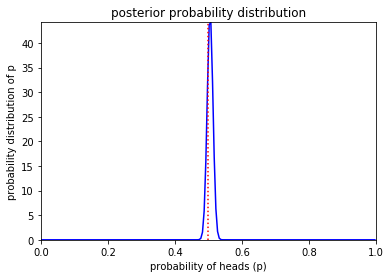

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  103


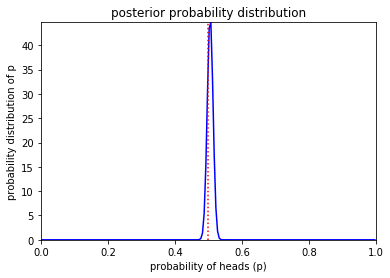

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.506
Check normalization: integral of posterior =  1.0
TrialSet =  104


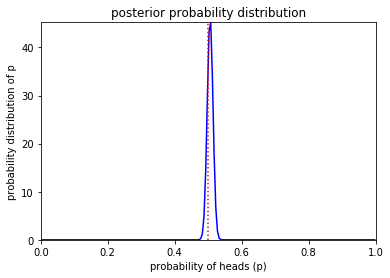

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.506
Check normalization: integral of posterior =  1.0
TrialSet =  105


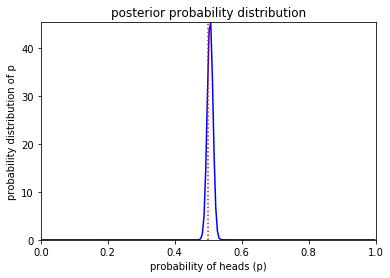

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.506
Check normalization: integral of posterior =  1.0
TrialSet =  106


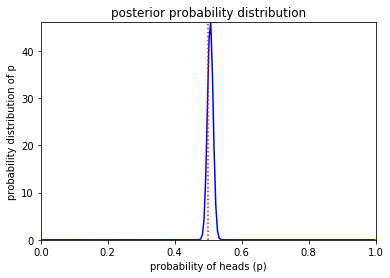

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.506
Check normalization: integral of posterior =  1.0
TrialSet =  107


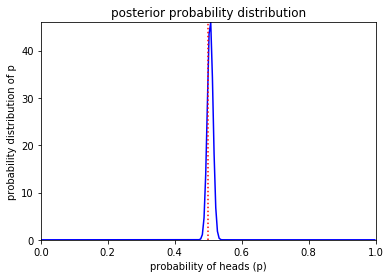

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.506
Check normalization: integral of posterior =  1.0
TrialSet =  108


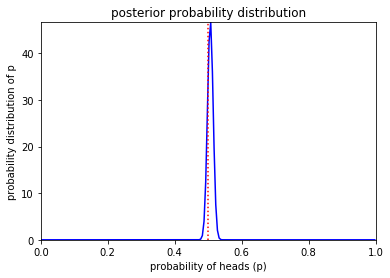

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  109


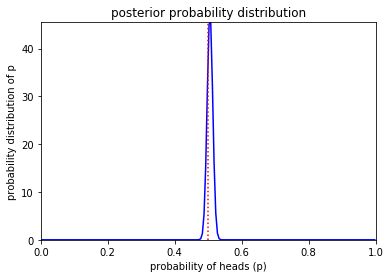

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.505
Check normalization: integral of posterior =  1.0
TrialSet =  110


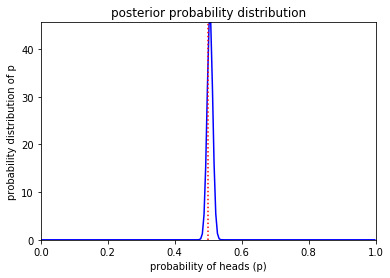

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.506
Check normalization: integral of posterior =  1.0
TrialSet =  111


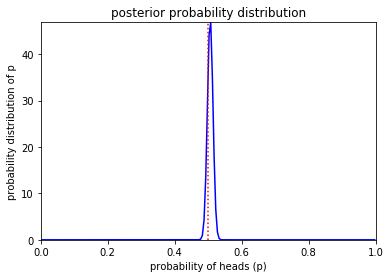

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.507
Check normalization: integral of posterior =  1.0
TrialSet =  112


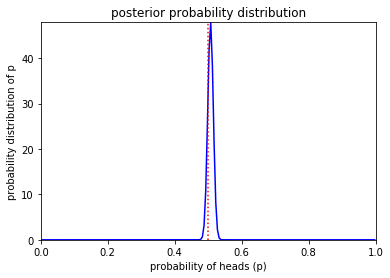

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  113


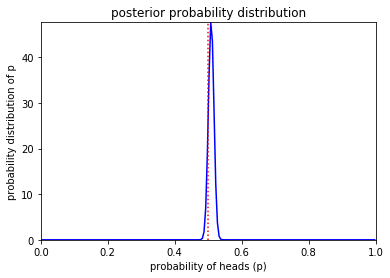

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.508
Check normalization: integral of posterior =  1.0
TrialSet =  114


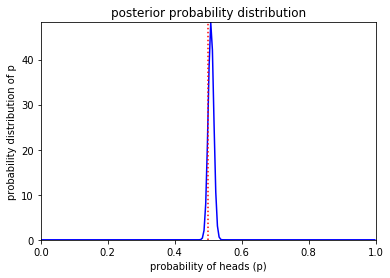

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  115


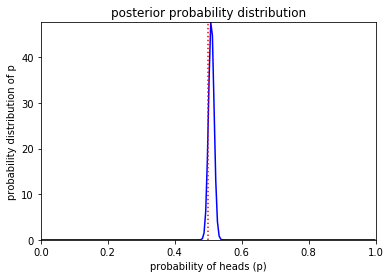

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  116


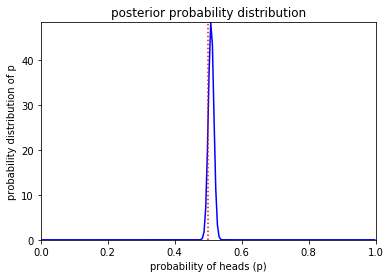

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  117


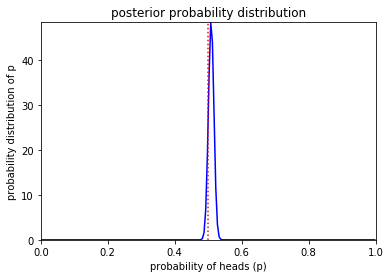

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  118


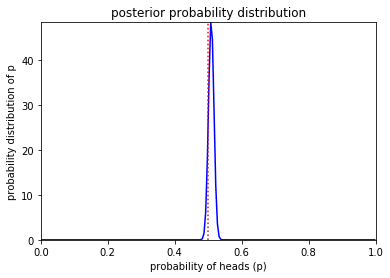

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  119


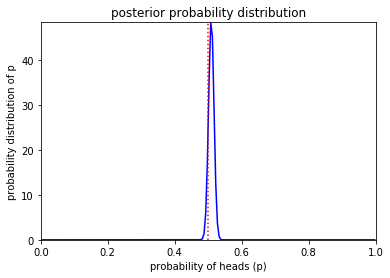

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  120


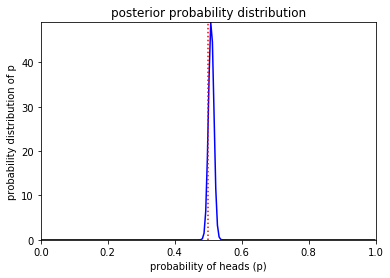

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  121


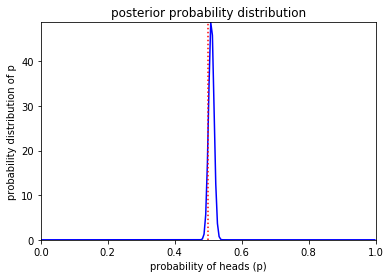

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.51
Check normalization: integral of posterior =  1.0
TrialSet =  122


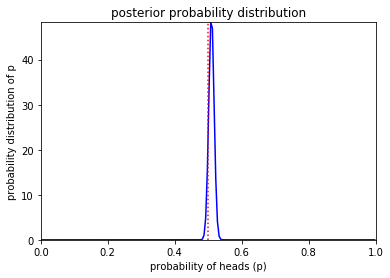

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.51
Check normalization: integral of posterior =  1.0
TrialSet =  123


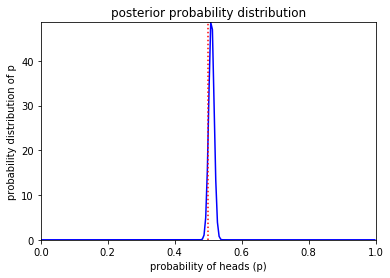

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.51
Check normalization: integral of posterior =  1.0
TrialSet =  124


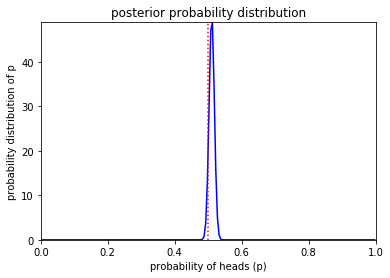

true probabilty of heads =  0.5 , Bayesian estimate =  0.512 ; simple estimate = H /(H+T) =  0.51
Check normalization: integral of posterior =  1.0
TrialSet =  125


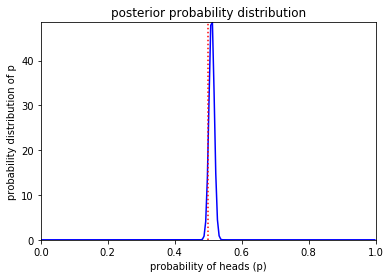

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  126


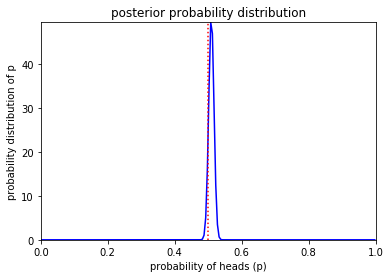

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  127


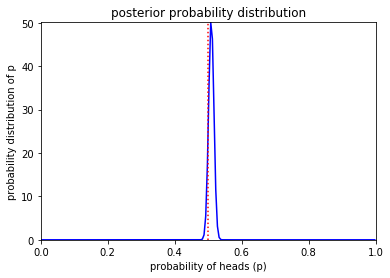

true probabilty of heads =  0.5 , Bayesian estimate =  0.507 ; simple estimate = H /(H+T) =  0.509
Check normalization: integral of posterior =  1.0
TrialSet =  128


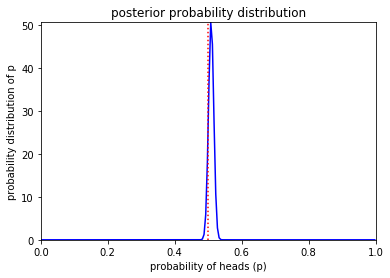

In [11]:
### Initialization of Loop ###
#
# set number of TrialSet iterations
Ntrials = 128 
itrial = 1
#
# Trial_Set_0 posterior becomes Trial_Set_1 prior at beginning of loop 
Lrho = Lrho1
#
zeros = [0.0 for i in range(0,Ntrials + 1)] # list of zeros for plotting purposes
#
# start running error list (deviation of estimate from true probability of heads)
dev_est = zeros                             # initialize list
dev_est[0] =  prob_peak0 - pH0              # error of Trial_Set_0
#
# start iteration
#
while itrial <= Ntrials:
    pHT = []
    Result = TrialSet(NF)
    H = Result[0]
    T = Result[1]
#
    NumHeads = NumHeads + H
    NumTails = NumTails + T
# simple estimate of probability of heads = H/(T+H)
    Simple_est = round(float(NumHeads) / float(NumHeads + NumTails), 3)
#
    errorS.append(Simple_est - pH0)  # update list of simple errors   
#
    for i in range(0,Nd):
        value = probHT(Lpvalues[i],H,T)
        pHT.append(value)
#
    numerator = MultLists(pHT,Lrho)
    denominator = IntegLists(pHT,Lrho)
    Arho = numerator / denominator
    Lrho = Arho.tolist()

# Check normalization of the posterior probability distribution
    IntLrho = sum(Lrho)/float(Nd)   # integrate probability density 
    IntLrho = round(IntLrho,5)      # round it off
#
    peak_index = Lrho.index(max(Lrho)) 
    prob_peak = Lpvalues[peak_index]    # probability corresponding to posterior peak
    Bayes_est = round(prob_peak,3)      # round it off
#
    errorB.append(Bayes_est - pH0)  # update list of Bayes errors
#
    flips.append(NF + itrial*NF)    # update list of number of flips     
#
    dev_est[itrial] = prob_peak - pH0   # update itrail-th element in error list
#
    print("true probabilty of heads = ", pH0, ", Bayesian estimate = ", Bayes_est, "; simple estimate = H /(H+T) = ", Simple_est)
    print("Check normalization: integral of posterior = ", IntLrho)
    print("TrialSet = ", itrial)
#   
    plt.plot(Lpvalues, Lrho, color = "b" )
    plt.axvline(x=pH0, color = "r", linestyle = ":")    # indicate true probabilty of heads with verical line
    plt.xlabel('probability of heads (p)')
    plt.ylabel('probability distribution of p')
    plt.xlim(0.0,1.0)
    plt.ylim(0.0, max(Lrho))
    plt.title('posterior probability distribution')
#
    plt.show()
    itrial = itrial + 1

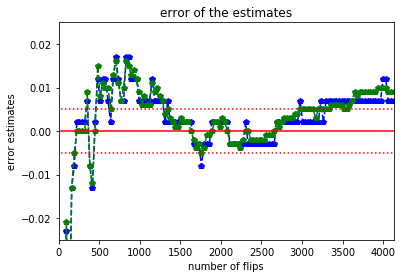

resolution of Bayes estimate (blue dots) limited by discretization, resolution =  0.005


In [12]:
total_flips = (1 + Ntrials)*NF
#
zeros = np.array(flips)
#
zeros = 0.0*zeros
upper = zeros + delta_p
lower = zeros - delta_p
#
zeros = zeros.tolist()
upper = upper.tolist()
lower = lower.tolist()
#
plt.plot(flips, errorB, color = "b", marker = "p", linestyle = "--")
plt.plot(flips, errorS, color = "g", marker = "p", linestyle = "--")
plt.plot(flips, zeros, color = "r", linestyle = "-")
plt.plot(flips, upper, color = "r", linestyle = ":")
plt.plot(flips, lower, color = "r", linestyle = ":")
#
plt.xlabel('number of flips')
plt.ylabel('error estimates')
#
plt.xlim(0,total_flips)
plt.ylim(-5.0*delta_p,5.0*delta_p)
plt.title("error of the estimates")
#
plt.show()
#
print("resolution of Bayes estimate (blue dots) limited by discretization, resolution = ", round(delta_p,4) )